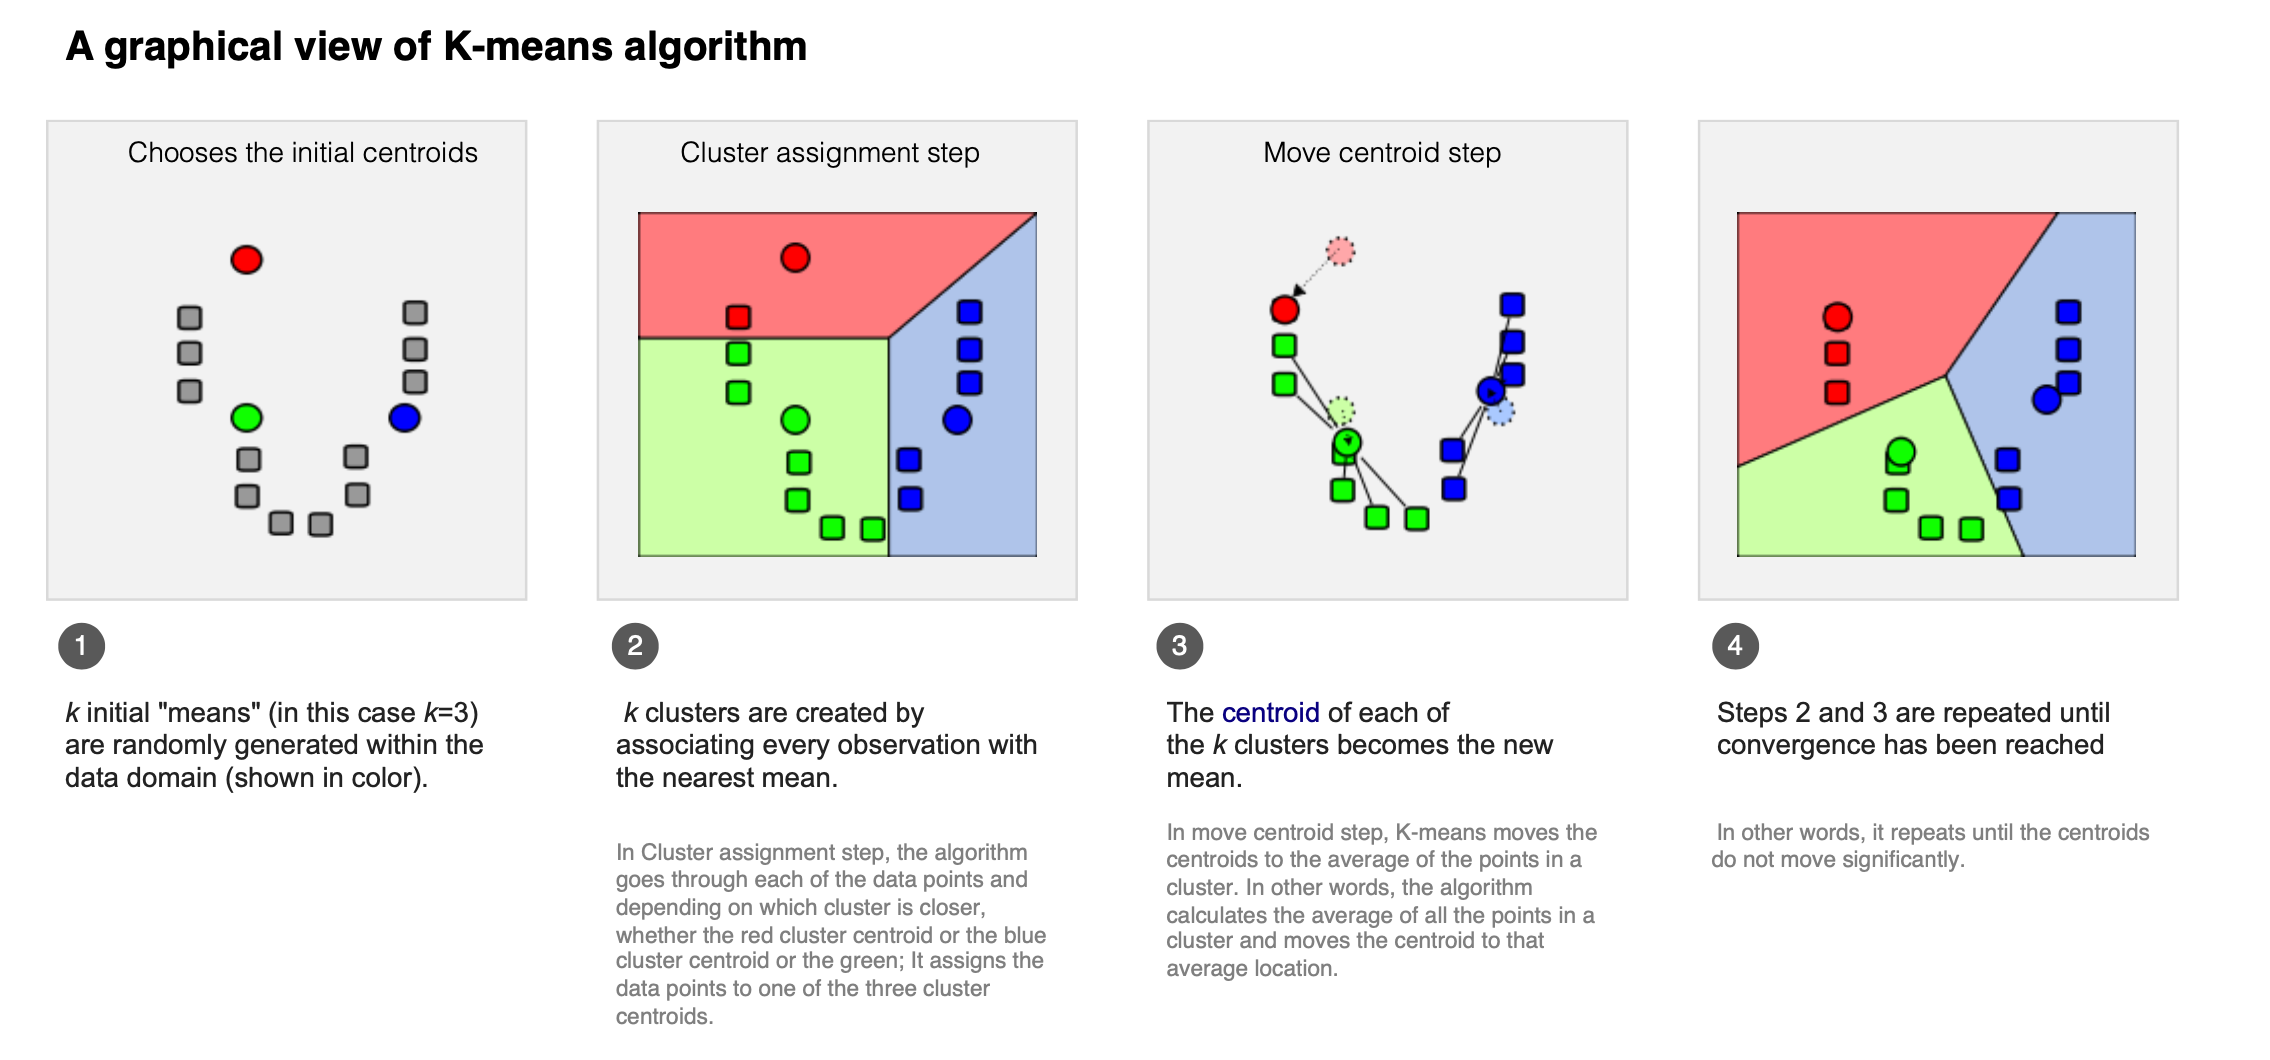  Source of diagram: https://en.wikipedia.org/wiki/K-means_clustering

## Import the libraries that will be used and get the defined data

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

## Get the data needed, sometimes data need to be preprocessed

In [2]:
def load(txt_path):
    with open(txt_path, 'r') as f:
        content = f.readlines()
    X = []
    for each_line in content:
        x = each_line.replace('\n', '')
        x0 = float(x.split(',')[0])
        x1 = float(x.split(',')[1])
        x = [x0, x1]
        X.append(x)
    X_M = np.array(X)
    return X_M

txt_path = 'data/clusters.txt' # data stored in the data directory
data = load(txt_path)

print(f'data.shape: {data.shape}')
print(f'example of a data point: {data[0]}')

data.shape: (150, 2)
example of a data point: [-1.86133124 -2.99168277]


## First part of k-means: Initialize the k centroids, we assume k is given

In [3]:
def initialize_centroid(data, k):
    data_list = list(data)
    centroids_list = random.sample(data_list, k) # pick different samples , here data_list has to be list type
    centroids = np.array(centroids_list)
    return centroids

k = 3 
initial_centroids = initialize_centroid(data,k)
print('initial_centroids: ')
print(initial_centroids)

initial_centroids: 
[[5.69945536 3.43390287]
 [1.66711177 2.51038894]
 [6.80706352 5.51771015]]


## Secod part: assign each data point to its nearest centroid


In [4]:
def calculate_dist(xi, centroids):  
    # calculate the distance between data point and each centroid  
    distances = np.sqrt(np.sum((xi-centroids)**2,axis=1))
    return distances


def assign_to_clsuters(data,centroids):
    cluster_list = [[] for i in range(len(centroids))]
    for point in data:
        distances = calculate_dist(point,centroids) # (k, )
        min_dis = min(distances)
        assign_cluster = list(distances).index(min_dis)
        cluster_list[assign_cluster].append(point)
        
    return cluster_list


cluster_list = assign_to_clsuters(data,initial_centroids)
print(f'cluster num: {len(cluster_list)}')
points_num = [len(i) for i in cluster_list]
print(f"each cluster's points num: { points_num}")

cluster num: 3
each cluster's points num: [27, 105, 18]


## Third part: for each cluster, recompute its centroid

In [5]:
def recompute_centroid(cluster_list):
    
    new_centroids_list = []
    
    for cluster in cluster_list:
        data_points_list = cluster[:]
        data_points = np.array(data_points_list)
        mean = np.mean(data_points,axis=0)
 
        new_centroids_list.append(mean)
        
    new_centroids = np.array(new_centroids_list)
    
    return new_centroids

new_centroids = recompute_centroid(cluster_list)
new_centroids

array([[ 4.7091659 ,  3.12144773],
       [-0.35787584, -0.20289357],
       [ 6.34659399,  5.8234805 ]])

## Repetition : repeat 2nd and 3rd part until convergence

In [6]:
count = 0
former_centroids = initial_centroids
new_centroids = []
while True:
    
    cluster_list = assign_to_clsuters(data,former_centroids)
    new_centroids = recompute_centroid(cluster_list)
    
    if (former_centroids == new_centroids).all():
        break
    else:
        former_centroids = new_centroids    
    count+=1
    if count>10000:
        break

print(new_centroids,count)

[[ 3.28884856  1.93268837]
 [-0.96065291 -0.65221841]
 [ 5.73849535  5.16483808]] 7


## Visualization of the result

After clustering, the centroids are :
[[ 3.28884856  1.93268837]
 [-0.96065291 -0.65221841]
 [ 5.73849535  5.16483808]]


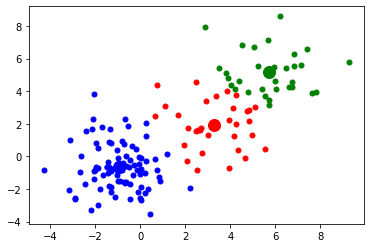

In [7]:
print('After clustering, the centroids are :' )
print(new_centroids)

# here plot the result to show the effect
mark = ['or', 'ob', 'og',]
for i,cluster in enumerate(cluster_list):
    for point in cluster:
        plt.plot(point[0], point[1], mark[i], markersize=5)

for i in range(k):
    plt.plot(new_centroids[i][0], new_centroids[i][1], mark[i], markersize=12)

plt.show()